In [1]:
from google.colab import drive

drive.mount("/content/drive/")

Mounted at /content/drive/


### 초기 작업 (안해도됨)
데이터 취합해서 하나의 training set 구성

In [2]:
import pandas as pd
import os
from tqdm.notebook import tqdm

path = '/content/drive/MyDrive/sharechat_recsys2023_data/train/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')] ## 파일명 끝이 .csv인 경우

print(file_list_py)
df = pd.DataFrame()
for i in tqdm(file_list_py):
    data = pd.read_csv(path + i, sep = '\t')
    df = pd.concat([df,data])

df = df.reset_index(drop = True)

['000000000000.csv', '000000000001.csv', '000000000002.csv', '000000000003.csv', '000000000004.csv', '000000000005.csv', '000000000006.csv', '000000000007.csv', '000000000008.csv', '000000000009.csv', '000000000010.csv', '000000000011.csv', '000000000012.csv', '000000000013.csv', '000000000014.csv', '000000000015.csv', '000000000016.csv', '000000000017.csv', '000000000018.csv', '000000000019.csv', '000000000020.csv', '000000000021.csv', '000000000022.csv', '000000000023.csv', '000000000024.csv', '000000000025.csv', '000000000026.csv', '000000000027.csv', '000000000028.csv', '000000000029.csv']


  0%|          | 0/30 [00:00<?, ?it/s]

In [40]:
df.to_csv('/content/drive/MyDrive/sharechat_recsys2023_data/train/ttl_train.csv', index = False)

In [21]:
print(len(df))
df.info(memory_usage='deep')

3485852
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485852 entries, 0 to 3485851
Data columns (total 82 columns):
 #   Column        Dtype  
---  ------        -----  
 0   f_0           int64  
 1   f_1           int64  
 2   f_2           int64  
 3   f_3           int64  
 4   f_4           int64  
 5   f_5           int64  
 6   f_6           int64  
 7   f_7           int64  
 8   f_8           int64  
 9   f_9           int64  
 10  f_10          int64  
 11  f_11          int64  
 12  f_12          int64  
 13  f_13          int64  
 14  f_14          int64  
 15  f_15          int64  
 16  f_16          int64  
 17  f_17          int64  
 18  f_18          int64  
 19  f_19          int64  
 20  f_20          int64  
 21  f_21          int64  
 22  f_22          int64  
 23  f_23          int64  
 24  f_24          int64  
 25  f_25          int64  
 26  f_26          int64  
 27  f_27          int64  
 28  f_28          int64  
 29  f_29          int64  
 30  f_30      

### 데이터 불러오기


In [14]:
# # import pandas as pd
# tt = pd.read_csv('/content/drive/MyDrive/sharechat_recsys2023_data/submit/first_submit_xgb.csv', sep = ',')
# tt.rename(columns = {'row_id':'RowId'}, inplace = True)
# tt = tt[['RowId','is_clicked','is_installed']]
# tt.to_csv('/content/drive/MyDrive/sharechat_recsys2023_data/submit/first_submit_xgb.csv', index = False)

In [32]:
import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/sharechat_recsys2023_data/train/ttl_train.csv', sep = ',')
testdata = pd.read_csv('/content/drive/MyDrive/sharechat_recsys2023_data/test/000000000000.csv', sep = '\t')

In [33]:
target1 = 'is_clicked'
target2 = 'is_installed'

df[[target1, target2]].value_counts(normalize = True)
# df[(df[target1]==1)][target2].value_counts(normalize = True)
df[(df[target1]==0)][target2].value_counts(normalize = True)

0    0.868123
1    0.131877
Name: is_installed, dtype: float64

클릭 전환율 21%
클릭 후 설치 전환율 32%

클릭 안했을 때의 설치 전환율 13%



In [26]:
click_corr = df.corr()['is_clicked']

In [28]:
click_corr.sort_values(ascending =False)

is_clicked      1.000000
f_66            0.210958
f_43            0.210904
is_installed    0.209396
f_69            0.155156
                  ...   
f_67           -0.055462
f_59           -0.084293
f_4            -0.105930
f_51           -0.144315
f_7                  NaN
Name: is_clicked, Length: 82, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import plot_importance

seed = 7
test_size = 0.33
train, test = train_test_split(df, test_size=test_size, random_state=seed)


train_x1 = train.drop(columns = [target1, target2])
train_x2 = train.drop(columns = [target2])
train_y1 = train[[target1]]
train_y2 = train[[target2]]

test_x = test.drop(columns = [target1, target2])
test_y1 = test[[target1]]
test_y2 = test[[target2]]

In [42]:
train_x1

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79
2992267,1638866,50,3346,22294,14088,25604,21561,27941,21621,21533,...,0.986307,0.0,0.000000,0.0,0.077128,1.156922,0.269948,0.0,0.000000,0.0
97902,2393775,57,2809,22294,7230,21545,694,27941,18800,21533,...,1.705561,0.0,0.000000,0.0,0.038564,1.002666,0.269948,0.0,37.384575,0.0
3474464,1078821,46,20095,563,22861,25604,22651,27941,19203,14659,...,0.000000,0.0,0.000000,0.0,0.115692,1.156922,0.269948,0.0,0.000000,0.0
60270,614644,62,26325,7152,21563,21545,8190,27941,19203,23218,...,2.022762,0.0,0.000000,0.0,0.115692,1.156922,0.269948,0.0,0.000000,0.0
3242210,1442529,53,17216,7152,15742,25604,23877,27941,21218,14659,...,0.622530,0.0,0.571121,0.0,0.115692,1.156922,0.269948,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937043,1596121,47,20095,563,22861,21545,22651,27941,21621,23218,...,0.000220,0.0,0.000000,0.0,0.077128,0.077128,0.077128,0.0,0.000000,0.0
2632182,1992667,57,23611,22294,17511,21545,12328,27941,19203,21533,...,2.995264,0.0,0.571121,0.0,0.000000,0.848410,0.269948,0.0,0.000000,0.0
2671129,1966544,56,890,22294,18294,15908,20210,27941,21218,869,...,1.257400,0.0,0.000000,0.0,0.000000,1.156922,0.269948,0.0,0.000000,0.0
3335364,820372,48,25235,22294,575,15908,23799,27941,19203,23218,...,1.187607,0.0,0.000000,0.0,0.000000,1.156922,0.269948,0.0,0.000000,0.0


In [43]:
import xgboost as xgb
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier()
model1.fit(train_x1, train_y1)
model2.fit(train_x2, train_y2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

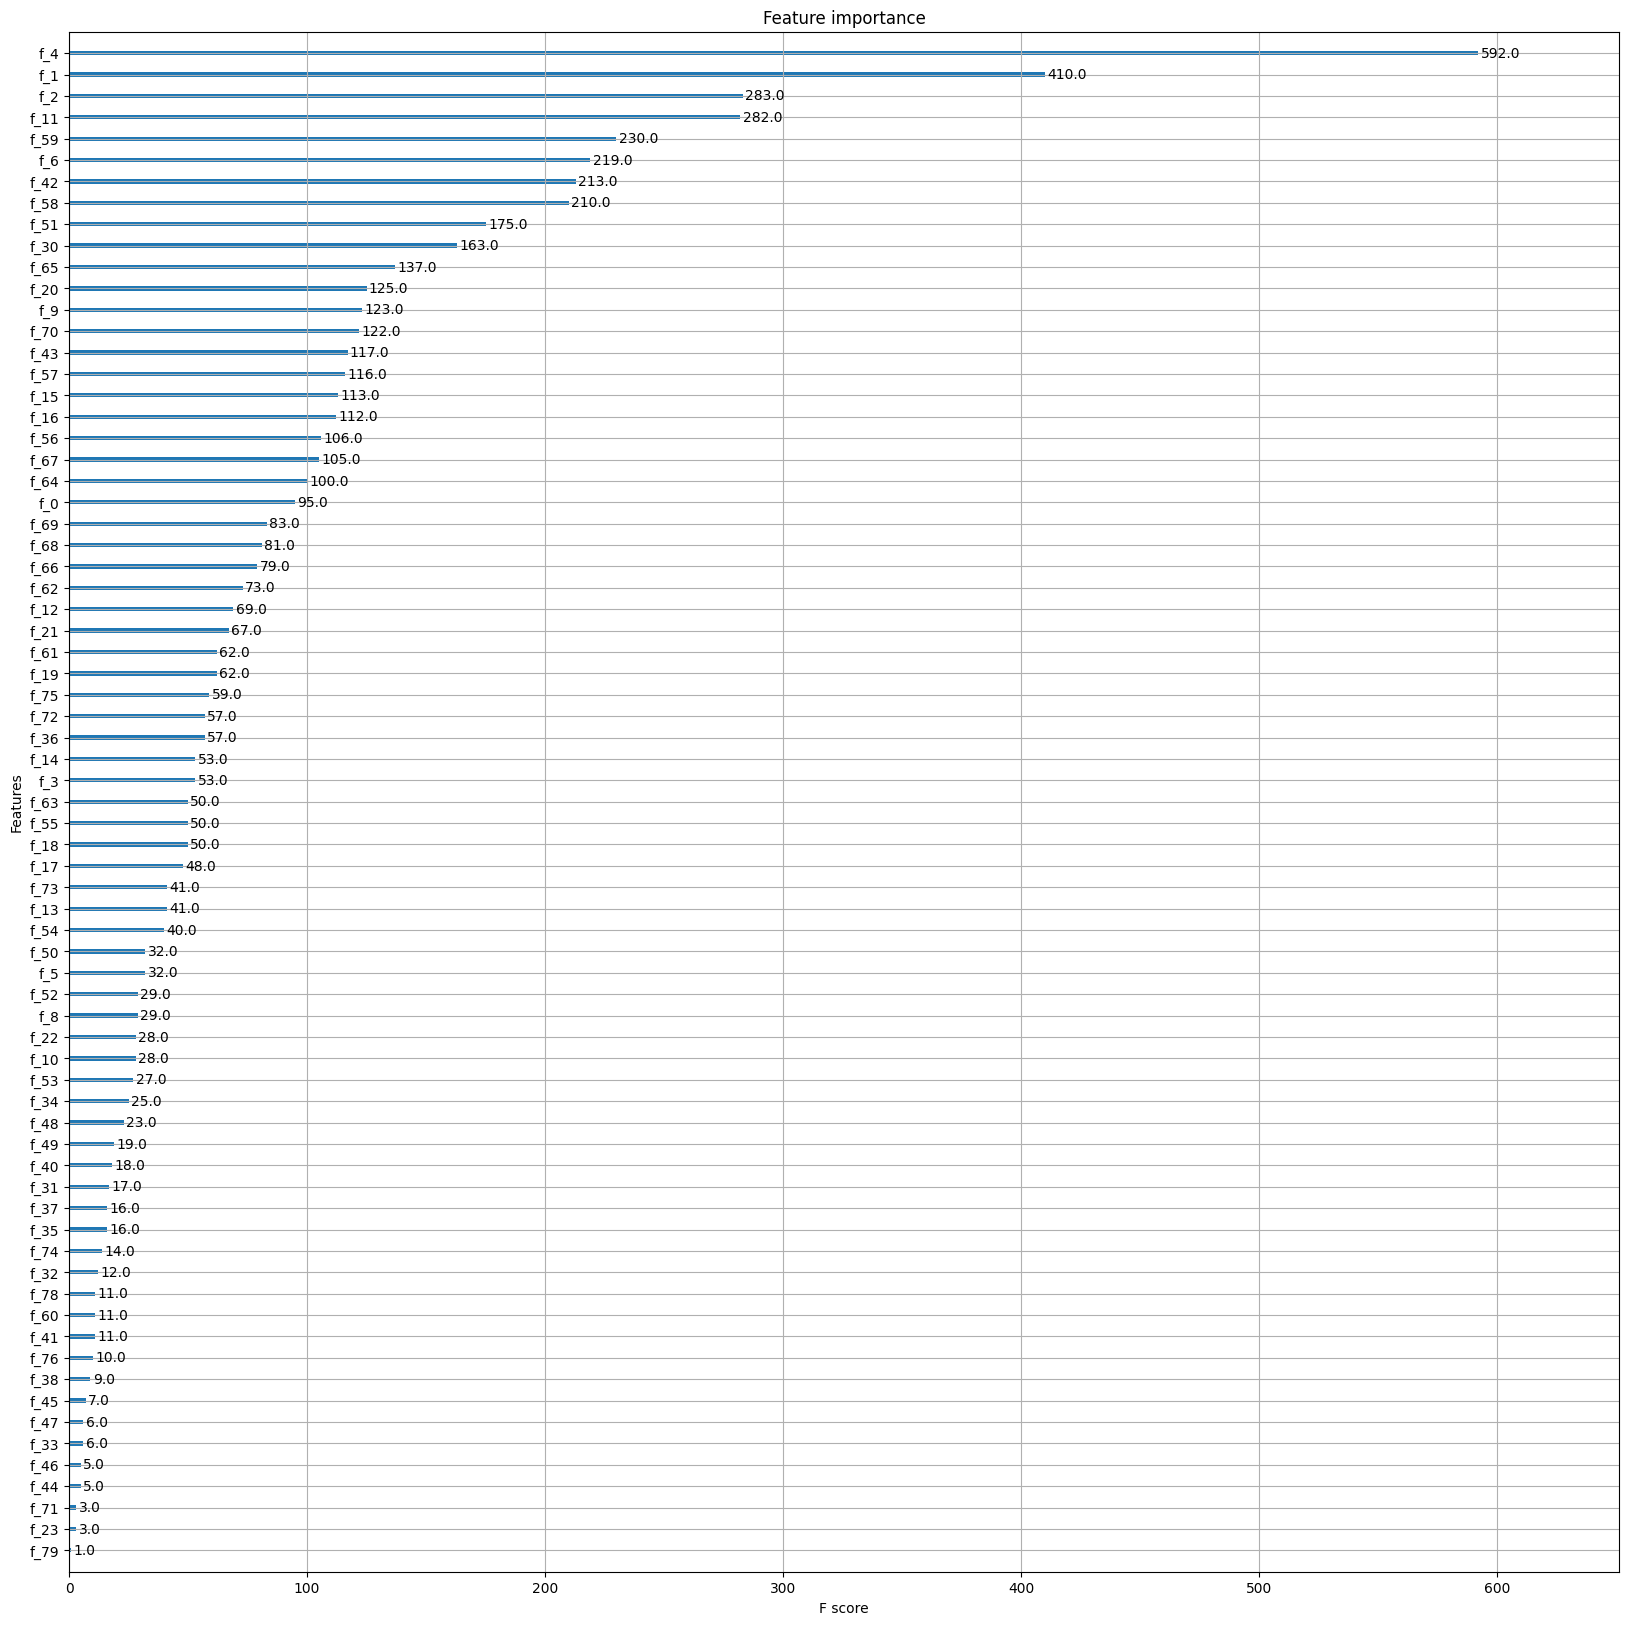

In [56]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,20)
plot_importance(model1)

In [102]:
y1_pred = model1.predict(test_x.drop(columns = ['is_clicked']))


In [89]:
y1_pred

0.053146295

In [91]:
test_x['is_clicked'] = y1_pred

In [66]:
test_x.rename(columns = {'f_80':'is_clicked'}, inplace = True)

In [92]:
y2_pred = model2.predict(test_x)

In [68]:
from sklearn.metrics import f1_score, classification_report

print(classification_report(test_y1, y1_pred))
print(classification_report(test_y2, y2_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94    896884
           1       0.91      0.58      0.71    253448

    accuracy                           0.90   1150332
   macro avg       0.90      0.78      0.82   1150332
weighted avg       0.90      0.90      0.89   1150332

              precision    recall  f1-score   support

           0       0.90      0.97      0.94    950407
           1       0.79      0.49      0.60    199925

    accuracy                           0.89   1150332
   macro avg       0.85      0.73      0.77   1150332
weighted avg       0.88      0.89      0.88   1150332



In [98]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
print(classification_report(test_y1, y1_pred))
print(confusion_matrix(test_y1, y1_pred))
# print(classification_report(test_y2, y2_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92    896884
           1       0.69      0.73      0.71    253448

    accuracy                           0.87   1150332
   macro avg       0.81      0.82      0.81   1150332
weighted avg       0.87      0.87      0.87   1150332

[[815628  81256]
 [ 69275 184173]]


In [103]:
print(classification_report(test_y1, y1_pred))
print(confusion_matrix(test_y1, y1_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94    896884
           1       0.91      0.58      0.71    253448

    accuracy                           0.90   1150332
   macro avg       0.90      0.78      0.82   1150332
weighted avg       0.90      0.90      0.89   1150332

[[883221  13663]
 [106708 146740]]


In [109]:
y1_pred = model1.predict_proba(test_x.drop(columns = ['is_clicked']))[:,1] > 0.25
test_x['is_clicked'] = y1_pred
y2_pred = model2.predict_proba(test_x)[:,1] > 0.25

print(classification_report(test_y1, y1_pred))
print(classification_report(test_y2, y2_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92    896884
           1       0.69      0.73      0.71    253448

    accuracy                           0.87   1150332
   macro avg       0.81      0.82      0.81   1150332
weighted avg       0.87      0.87      0.87   1150332

              precision    recall  f1-score   support

           0       0.93      0.85      0.89    950407
           1       0.51      0.72      0.59    199925

    accuracy                           0.83   1150332
   macro avg       0.72      0.78      0.74   1150332
weighted avg       0.86      0.83      0.84   1150332



<bound method XGBModel.set_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)>

In [27]:
testdata

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79
0,64505,67,26325,7152,21563,19475,31440,27941,21621,14659,...,1.519085,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,64506,67,20095,563,22861,19475,21280,27941,19203,14659,...,0.000000,0.0,0.000000,0.000000,0.115692,1.156922,0.269948,0.0,0.000000,0.000000
2,64507,67,890,22294,18294,21545,20210,27941,18800,9638,...,0.982995,0.0,0.000000,0.000000,0.000000,1.156922,0.269948,0.0,0.000000,0.000000
3,64508,67,20095,563,22861,25604,21280,27941,18800,14659,...,0.000000,0.0,2.284486,0.000000,0.000000,1.156922,0.269948,0.0,0.000000,0.000000
4,64509,67,27426,22294,11338,19475,23855,27941,21218,9638,...,0.986040,0.0,0.000000,0.000000,0.077128,0.077128,0.077128,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160968,16240,67,26325,22294,4896,25604,23841,27941,21218,14659,...,1.519085,0.0,0.000000,0.000000,0.115692,1.156922,0.269948,0.0,0.000000,0.000000
160969,16241,67,14963,22294,26466,21545,8488,27941,19203,14659,...,1.420631,0.0,0.571121,0.571121,0.115692,1.156922,0.269948,0.0,37.384575,37.384575
160970,16242,67,20095,563,31686,21545,590,27941,21218,14659,...,0.000000,0.0,2.284486,1.142243,0.115692,1.156922,0.269948,0.0,37.384575,0.000000
160971,16243,67,890,7152,497,21545,876,27941,19606,14659,...,0.982995,0.0,0.571121,0.000000,0.000000,1.156922,0.269948,0.0,0.000000,0.000000


In [47]:
test1_pred = model1.predict_proba(testdata)[:,1]
testdata['is_clicked'] = test1_pred
test2_pred = model2.predict_proba(testdata)[:,1]
testdata['is_installed'] = test2_pred
testcomplete = testdata[['f_0', 'is_clicked','is_installed']]

In [50]:
testcomplete.rename(columns = {'f_0': 'row_id'}, inplace = True)

<ipython-input-50-1980173889cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testcomplete.rename(columns = {'f_0': 'row_id'}, inplace = True)


In [53]:
testcomplete.to_csv('/content/drive/MyDrive/sharechat_recsys2023_data/submit/first_submit_xgb.csv', index = False)

In [54]:
d = pd.read_csv('/content/drive/MyDrive/sharechat_recsys2023_data/submit/first_submit_xgb.csv')
d

,row_id,is_clicked,is_installed
0,64505,0.453180,0.118814
1,64506,0.162139,0.465485
2,64507,0.557802,0.294794
3,64508,0.313429,0.346633
4,64509,0.716360,0.578354
...,...,...,...
160968,16240,0.350059,0.071157
160969,16241,0.126049,0.010185
160970,16242,0.173987,0.391492
160971,16243,0.584206,0.428561


In [15]:
df

,Unnamed: 0,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,is_clicked,is_installed
0,0,2541162,51,6581,22294,5491,25604,14597,27941,18800,...,3.997850,1.713364,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
1,1,2541260,49,20095,563,22861,15908,22651,27941,21218,...,0.000000,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
2,2,2541318,51,20095,563,22861,25604,22651,27941,21218,...,0.000000,0.000000,0.038564,1.156922,0.269948,0.0,0.0,0.0,0,0
3,3,2541770,64,13658,22294,7003,25604,29975,27941,21218,...,1.713364,1.142243,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
4,4,2542002,62,20095,563,31686,15908,590,27941,18800,...,0.000000,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3485847,3485847,1988041,62,12577,22294,2059,25604,18309,27941,21218,...,0.000000,0.000000,0.000000,0.231384,0.000000,0.0,0.0,0.0,0,0
3485848,3485848,1988471,45,27426,22294,11338,21545,25991,27941,19203,...,1.142243,0.000000,0.000000,1.156922,0.269948,0.0,0.0,0.0,0,0
3485849,3485849,1988651,56,26325,22294,9018,25604,943,27941,21218,...,1.142243,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
3485850,3485850,1988792,48,31824,22294,6036,19475,9209,27941,19203,...,2.284486,1.713364,0.000000,1.156922,0.269948,0.0,0.0,0.0,0,0
